Logistic Classification
=======================

*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_python/) for details about how to install the toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$
$\newcommand{\eqdef}{\equiv}$

This tour details the logistic classification method (for 2 classes and
multi-classes).


_Warning:_ Logisitic classification is actually called ["logistic
regression"](https://en.wikipedia.org/wiki/Logistic_regression) in the literature, but it is in fact a classification method.


We recommend that after doing this Numerical Tours, you apply it to your
own data, for instance using a dataset from [LibSVM](https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/).

_Disclaimer:_ these machine learning tours are intended to be
overly-simplistic implementations and applications of baseline machine learning methods.
For more advanced uses and implementations, we recommend
to use a state-of-the-art library, the most well known being
[Scikit-Learn](http://scikit-learn.org/)

In [1]:
%matplotlib inline
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

We define a few helpers.

In [2]:
def find(x): return np.nonzero(x)[0]

Two Classes Logistic Classification
-----------------------------------
Logistic classification is, with [support vector machine (SVM)](https://en.wikipedia.org/wiki/Support_vector_machine), the baseline
method to perform classification. Its main advantage over SVM is that is
is a smooth minimization problem, and that it also output class
probabity, offering a probabilistic interpretation of the classification.


To understand the behavior of the method, we generate synthetic data
distributed according to a mixture of Gaussian with an overlap governed by an offset $\omega$.
 Here classes indexes are set to $y_i \in
\{-1,1\}$ to simplify the equations.

In [3]:
n = 1000 # number of sample
p = 2 # dimensionality
omega = np.array([1,.5])*2.5 # offset 
n1 = int(n/2)
X = np.vstack(( np.random.randn(n1,2), np.random.randn(n1,2)+np.ones([n1,1])*omega ))
y = np.vstack(( np.ones([n1,1]), -np.ones([n1,1]) ))

Plot the classes.

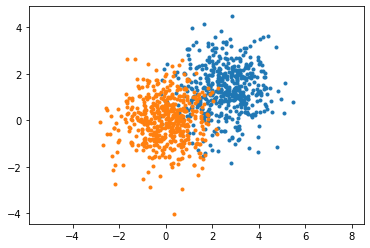

In [4]:
I = find(y==-1)
J = find(y==1)
plt.clf
plt.plot(X[I,0], X[I,1], '.')
plt.plot(X[J,0], X[J,1], '.')
plt.axis('equal');

Logistic classification minimize a logistic loss in place of the usual
$\ell^2$ loss for regression
  $$ \min_{w} E(w) := \frac{1}{n} \sum_{i=1}^n L(\dotp{x_i}{w},y_i)  $$
where the logistic loss reads
  $$ L( s,y ) \eqdef \log( 1+\exp(-sy) ) $$
This corresponds to a smooth convex minimization. If $X$ is injective,
this is also strictly convex, hence it has a single global minimum.


Compare the binary (ideal) 0-1 loss, the logistic loss and the
<https://en.wikipedia.org/wiki/Hinge_loss hinge loss>
(the one used for SVM).

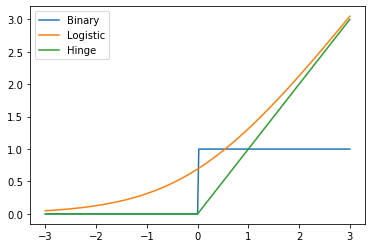

In [111]:
t = np.linspace(-3,3,255).transpose()
plt.clf
plt.plot(t, t>0)
plt.plot(t, np.log(1+np.exp(t)))
plt.plot(t, np.maximum(t,0) )
plt.axis('tight');
plt.legend(['Binary', 'Logistic', 'Hinge']);

This can be interpreted as a <https://en.wikipedia.org/wiki/Maximum_likelihood_estimation maximum likelihood estimator> when one
models the probability of  belonging to the two classes for sample $x_i$ as
  $$ h(x_i) \eqdef (\th(x_i),1-\th(x_i)) \qwhereq
          \th(s) \eqdef \frac{e^{s}}{1+e^s} = (1+e^{-s})^{-1}  $$


Re-writting the energy to minimize
  $$ E(w) = \Ll(X w,y) \qwhereq \Ll(s,y)= \frac{1}{n}  \sum_i L(s_i,y_i), $$
its gradient reads
  $$ \nabla E(w) = X^\top \nabla \Ll(X w,y)
      \qwhereq
      \nabla \Ll(s,y) = \frac{y}{n} \odot \th(-y \odot s),   $$
where $\odot$ is the pointwise multiplication operator, i.e. * in
Python.


Define the energies.

In [112]:
def L(s,y):  return 1/s.shape[0] * sum( np.log( 1 + np.exp(-s.reshape(y.shape)*y) ) )
def E(w,X,y): return L((X@w).reshape(y.shape),y);

Define their gradients.

In [113]:
def theta(v): return 1 / (1+np.exp(-np.clip(v,-30,30)))
def nablaL(s,r): return - 1/s.shape[0] * r * theta(-s * r)
def nablaE(w,X,y): return X.transpose().dot( nablaL((X@w).reshape(y.shape),y) )

_Important:_ in order to improve performance, it is important (especially
in low dimension $p$) to add a constant bias term $w_{p+1} \in \RR$, and replace $\dotp{x_i}{w}$
by $ \dotp{x_i}{w} + w_{p+1} $.  This is equivalently achieved by
adding an extra $(p+1)^{\text{th}}$ dimension equal to 1 to each
$x_i$, which we do using a convenient macro.

In [114]:
def AddBias(X): return np.hstack(( X, np.ones((np.size(X,0),1)) ))

With this added bias term, once $w_{\ell=0} \in \RR^{p+1}$ initialized
(for instance at $0_{p+1}$),

In [115]:
w = np.zeros((p+1,1))

Perform one step of gradient descent reads
$$ w_{\ell+1} = w_\ell - \tau_\ell \nabla E(w_\ell). $$

In [116]:
tau = 1; # here we are using a fixed tau
w = w - tau * nablaE(w,AddBias(X),y)

$$\tau < \frac{2}{L}$$
$$ L \leq \frac{1}{4}\norm{X}^2 $$
If one chooses 
$$\tau < \tau_{\max} \eqdef \frac{2}{\frac{1}{4}\norm{X}^2},$$
then one is sure that the gradient descent converges.

In [117]:
np.linalg.norm(X)
tau_max = 2/(1/4 * np.linalg.norm(AddBias(X), 2)**2 )
print(tau_max)

0.0015024235196930272


__Exercise 1__

Implement a gradient descent
$$ w_{\ell+1} = w_\ell - \tau_\ell \nabla E(w_\ell). $$
Monitor the energy decay.
Test different step size, and compare with the theory (in particular
plot in log domain to illustrate the linear rate).
etAR(1);
etAR(1);

In [121]:
# first do 
def gradient_descent(tau,n_steps,X,y,w_start = None,bias = None):
    if isinstance(bias,type(None)):
        Xext = X
    else:
        Xext = AddBias(X)
    if isinstance(w_start,type(None)):
        w = np.zeros((Xext.shape[1],1))
    else:
        w = w_start
    E_decay = []
    E_decay.append(E(w,Xext,y))
    for k in range(n_steps):
        w = w - tau * nablaE(w,Xext,y)
        E_decay.append(E(w,Xext,y))
    E_decay = np.array(E_decay)
    return w,E_decay


In [123]:
factor_list = [0.01,0.1,1,10,100,1000,10000]
tau_list = [tau_max*f for f in factor_list]

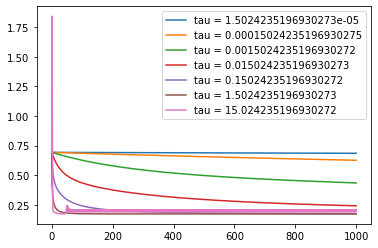

In [124]:
n_steps = 1000
a_steps = np.array(list(range(n_steps+1)))
for tau in tau_list : 
    w,E_decay = gradient_descent(tau,n_steps,X,y,bias = True)
    plt.plot(a_steps,E_decay,label = f'tau = {tau}')

    
plt.legend()
plt.show()

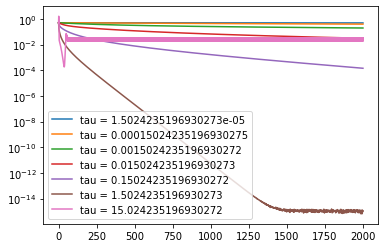

In [125]:
#ground_truth
n_steps = 10000
tau =1
w,E_decay = gradient_descent(tau,n_steps,X,y,bias = True)
E_truth = E_decay[-1]

#comparison

n_steps = 2000
a_steps = np.array(list(range(n_steps+1)))
eps = 1e-15
for tau in tau_list : 
    w,E_decay = gradient_descent(tau,n_steps,X,y,bias = True)
    plt.semilogy(a_steps,E_decay-E_truth + eps,label = f'tau = {tau}')

    
plt.legend()
plt.show()

Generate a 2D grid of points.

In [110]:
q = 201
tx = np.linspace( X[:,0].min(), X[:,0].max(),num=q) 
ty = np.linspace( X[:,1].min(), X[:,1].max(),num=q) 
[B,A] = np.meshgrid( ty,tx )
G = np.vstack([A.flatten(), B.flatten()]).transpose()

Evaluate class probability associated to weight vectors on this grid.

In [111]:
Theta = theta(AddBias(G).dot(w))
Theta = Theta.reshape((q,q))

Display the data overlaid on top of the
classification probability, this highlight the
separating hyperplane $ \enscond{x}{\dotp{w}{x}=0} $.

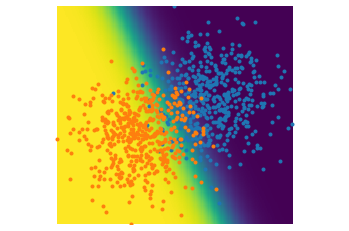

In [112]:
plt.clf
plt.imshow(Theta.transpose(), origin="lower",  extent=[tx.min(),tx.max(),ty.min(),ty.max()])
plt.axis('equal')
plt.plot(X[I,0], X[I,1], '.')
plt.plot(X[J,0], X[J,1], '.')
plt.axis('off');

__Exercise 2__

Test the influence of the separation offset $\omega$ on the result.

In [114]:
# this code takes into argument an ax and an offset and plots the reight image on the ax
def make_image(ax,offset = 2.5):
    n = 1000 # number of sample
    p = 2 # dimensionality
    omega = np.array([1,.5])*offset # offset 
    n1 = int(n/2)
    X = np.vstack(( np.random.randn(n1,2), np.random.randn(n1,2)+np.ones([n1,1])*omega ))
    y = np.vstack(( np.ones([n1,1]), -np.ones([n1,1]) ))
    q = 201
    tx = np.linspace( X[:,0].min(), X[:,0].max(),num=q) 
    ty = np.linspace( X[:,1].min(), X[:,1].max(),num=q) 
    [B,A] = np.meshgrid( ty,tx )
    G = np.vstack([A.flatten(), B.flatten()]).transpose()
    # compute the associated w
    n_steps = 2000
    tau = 1
    w,E_decay = gradient_descent(tau,n_steps,X,y,bias = True)
    Theta = theta(AddBias(G).dot(w))
    Theta = Theta.reshape((q,q))
    ax.imshow(Theta.transpose(), origin="lower",  extent=[tx.min(),tx.max(),ty.min(),ty.max()])
    ax.axis('equal')
    ax.plot(X[I,0], X[I,1], '.')
    ax.plot(X[J,0], X[J,1], '.')
    ax.axis('off')
    ax.set_title(f'offset = {offset}')

/opt/miniconda3/envs/p36/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


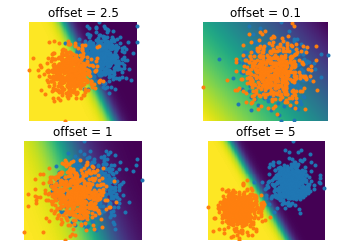

In [115]:
fig,ax = plt.subplots(2,2)
make_image(ax[0,0],offset =2.5)
make_image(ax[0,1],offset =0.1)
make_image(ax[1,0],offset =1)
make_image(ax[1,1],offset =5)
fig.show()

__Exercise 3__

Test logistic classification on a real life dataset. You can look at the Numerical Tour on stochastic gradient descent
for an example. Split the data in training and testing to evaluate the
classification performance, and check the impact of regularization.

In [275]:
from scipy import io
name = 'quantum';
U = io.loadmat('ml-' + name)
A = U['A']
A = A[np.random.permutation(A.shape[0]),:]
X = A[:,0:-1]
y = 2*A[:,-1]-1

In [276]:
split = 1/2 
ntrain = int(A.shape[0]*split)
Xtrain,ytrain = X[:ntrain,:],y[:ntrain]
Xtest,ytest = X[ntrain:,:],y[ntrain:]
ntest = A.shape[0]-ntrain
print(f'training set : {ntrain},test set : {ntest}')

training set : 5000,test set : 5000


In [277]:
#preprocessing : centering and renormalizing data

In [278]:
m_train = Xtrain.mean(0)
Xtrain -= m_train[None,:]
Xtest -= m_train[None,:]
s_train = np.sqrt((Xtrain**2).sum(0))
Xtrain = Xtrain[:,s_train > 0]
Xtest = Xtest[:,s_train > 0]
s_train = s_train[s_train > 0]
Xtrain /= s_train[None,:]
Xtest /= s_train[None,:]

In [323]:
#redoing the function with regularization (here I did l2 not l1)
def gradient_descent(tau,n_steps,X,y,Xtest,ytest,w_start = None,bias = None,reg=0,l2= False):
    if isinstance(bias,type(None)):
        Xext = X
        Xexttest= Xtest
    else:
        Xext = AddBias(X)
        Xexttest= AddBias(Xtest)
    if isinstance(w_start,type(None)):
        w = np.zeros((Xext.shape[1],1))
    else:
        w = w_start
    if reg == 0:
        l2 = False
        l1 = False
    E_decay = []
    E_decay_valid = []
    loss_valid = []
    E_decay.append(E(w,Xext,y))
    E_decay_valid.append(E(w,Xexttest,ytest))
    loss_valid.append((((Xexttest@w).reshape(ytest.shape)*ytest)>0).sum()/Xexttest.shape[0])
    for k in range(n_steps):
        if l2 : 
            w = w - tau * (nablaE(w,Xext,y).reshape(w.shape) + reg*w)
        else:
                
            w = w - tau * nablaE(w,Xext,y).reshape(w.shape)
        E_decay.append(E(w,Xext,y))
        E_decay_valid.append(E(w,Xexttest,ytest))
        loss_valid.append((((Xexttest@w).reshape(ytest.shape)*ytest)>0).sum()/Xexttest.shape[0])
    E_decay = np.array(E_decay)
    return w,E_decay,E_decay_valid,loss_valid

In [334]:
#hyperparameters 
tau = 2
n_steps=30000
reg = 0

In [335]:
w,E_decay,E_decay_valid,loss_valid = gradient_descent(tau,n_steps,Xtrain,ytrain,Xtest,ytest,bias = True,l2 = True,reg = 0)

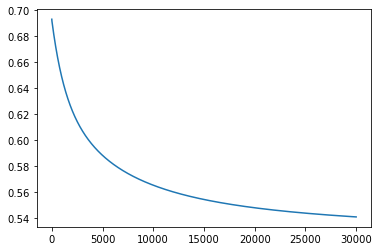

In [336]:
plt.plot(list(range(n_steps+1)),E_decay)
plt.show()

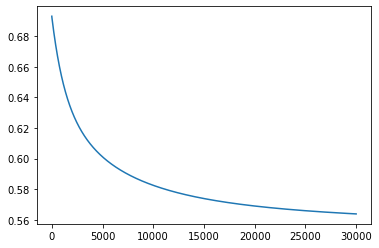

In [337]:
plt.plot(list(range(n_steps+1)),E_decay_valid)
plt.show()

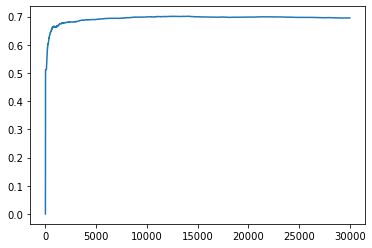

In [338]:
plt.plot(list(range(n_steps+1)),loss_valid)
plt.show()

In [128]:
# slow
def distmat1(X,Z):
    D = np.zeros((X.shape[0],Z.shape[0]))
    for i in np.arange(0,X.shape[0]):
        for j in np.arange(0,Z.shape[0]):
            D[i,j] = np.linalg.norm( X[i,:]-Z[j,:] );
    return D

In [129]:
# fast
from scipy import spatial
def distmat(X,Z): return spatial.distance.cdist(X,Z)**2

The gaussian kernel is the most well known and used kernel
$$ \kappa(x,y) \eqdef e^{-\frac{\norm{x-y}^2}{2\sigma^2}} . $$
The bandwidth parameter $\si>0$ is crucial and controls the locality of
the model. It is typically tuned through cross validation.

In [130]:
def kappa(X,Z,sigma): return np.exp( -distmat(X,Z)/(2*sigma**2) )

We generate synthetic data in 2-D which are not separable by an
hyperplane.

In [131]:
n = 1000
n1 = int(n/2)
p = 2;
t = 2*np.pi*np.random.randn(n1,1);
R = 2.5; 
r = R*(1.5 + .2*np.random.randn(n1,1)); # radius
X1 = np.hstack((np.cos(t)*r, np.sin(t)*r));
X = np.vstack((np.random.randn(n1,2), X1))
y = np.vstack(( np.ones([n1,1]), -np.ones([n1,1]) ))

Display the classes.

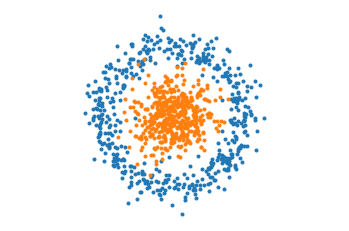

In [132]:
I = find(y==-1)
J = find(y==1)
plt.plot(X[I,0], X[I,1], '.')
plt.plot(X[J,0], X[J,1], '.')
plt.axis('equal')
plt.axis('off');

Once avaluated on grid points, the kernel define a matrix
$$ K = (\kappa(x_i,x_j))_{i,j=1}^n \in \RR^{n \times n}.  $$

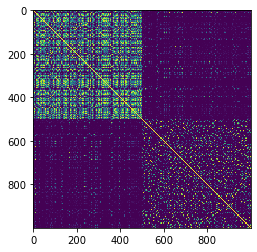

In [133]:
sigma = 1;
K = kappa(X,X,sigma)
plt.imshow(K);

Valid kernels are those that gives rise to positive symmetric matrices
$K$. The linear and Gaussian kernel are valid kernel functions. Other
popular kernels include the polynomial kernel $ \dotp{x}{y}^a $ for $a
\geq 1$ and the Laplacian kernel $ \exp( -\norm{x-y}^2/\si ) $.


The kernelized Logistic minimization reads
  $$ \umin{h} F(h) \eqdef \Ll(K h,y). $$

In [134]:
def F(h,K,y): return L(K@h,y)
def nablaF(h,K,y): return K.transpose()@ nablaL(K@h,y)

This minimization can be related to an infinite dimensional optimization
problem where one minimizes directly over the function $f$. This
is shown to be equivalent to the above finite-dimenisonal optimization problem
thanks to the theory of RKHS.

__Exercise 4__

Implement a gradient descent to minimize $F(h)$.
Monitor the energy decay.
Test different step size, and compare with the theory.

In [135]:
tau_max = 8/(K**2).sum()
print(f'tau max in theory : {tau_max}')

tau max in theory : 0.00012220348470672488


In [136]:
def gradient_descent(tau,n_steps,K,y):
    m = K.shape[0]
    h = np.zeros((m,1))
    E_decay = []
    E_decay.append(F(h,K,y))
    for k in range(n_steps):
        h = h-tau*nablaF(h,K,y)
        E_decay.append(F(h,K,y))
    return h,E_decay

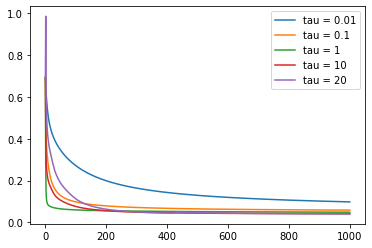

In [140]:
n_steps = 1000
tau_list = [0.01,0.1,1,10,20]

for tau in tau_list:
    h,E_decay =gradient_descent(tau,n_steps,K,y)
    plt.plot(list(range(n_steps+1)),E_decay,label = f'tau = {tau}')

plt.legend()
plt.show()
    
    

### Exercise 4 bis 

Do this with the right conditioning i.e. by factorizing by a cholesky factor. A cholesky factor here is a lower triangular matrix matrix $L$ such that $LL^{\top} = K$. The idea is to define a new variable $\tilde{h} := L^{\top} h$ : the problem is therefore $\min_{\tilde{h}}{L(L \tilde{h},y)}$. This yields much better results from a conditioning point of view; it is in fact the analog of looking for $\theta$ in the form $X^{\top} \omega$ since the kernel matrix associated to the linear kernel is $XX^{\top}$ which is a factorization of the same form.


Now to recover the predictor $f_{h}(x)$, if we denote with $K((x_i),x)\in \mathbb{R}^{n\times 1}$ the column vector $k(x_i,x)$, we have $f_{h}(x) = h^{\top} K((x_i),x) =\tilde{h}^{\top}(L^{-1}K((x_i),x))$. 

Similarly, if we want to compute the values of $f_h$ on a test set $(\tilde{x}_1,...,\tilde{x}_m)$, if $K_{nm}$ denotes the matrix such that $(K_{nm})_{ij} = k(x_i,\tilde{x}_j)$, we have that $(f_h(\tilde{x}_1),...,f_h(\tilde{x}_m)) = \tilde{h}^{\top}(L^{-1}K_{nm})$

In [141]:
def gradient_descent_cholesky(tau,n_steps,K,y):
    m = K.shape[0]
    h = np.zeros((m,1))
    L = np.linalg.cholesky(K+1e-12*np.eye(m))
    E_decay = []
    E_decay.append(F(h,L,y))
    for k in range(n_steps):
        h = h-tau*nablaF(h,L,y)
        E_decay.append(F(h,L,y))
    real_h = scp.linalg.solve_triangular(L,h,lower = True,trans = 1)
    return real_h,E_decay


In [142]:
tau_max = 8/(K).sum()
print(f'tau max in theory : {tau_max}')

tau max in theory : 7.030685614561034e-05


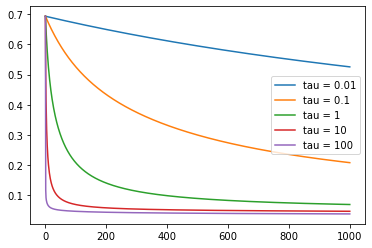

In [145]:
n_steps = 1000
tau_list = [0.01,0.1,1,10,100]

for tau in tau_list:
    h,E_decay =gradient_descent_cholesky(tau,n_steps,K,y)
    plt.plot(list(range(n_steps+1)),E_decay,label = f'tau = {tau}')

plt.legend()
plt.show()
    

Once this optimal $h$ has been found, class probability at a point
$x$ are obtained as
  $$ (\th(f_h(x)), 1-\th(f_h(x)) $$
where $f_h$ has been defined above.


We evaluate this classification probability on a grid.

In [48]:
q = 201
tmax = 5
t = np.linspace(-tmax,tmax,num=q)
[B,A] = np.meshgrid( t,t )
G = np.vstack([A.flatten(), B.flatten()]).transpose()
K1 = kappa(G,X,sigma)
Theta = theta( K1.dot(h) )
Theta = Theta.reshape((q,q))

Display the classification probability.

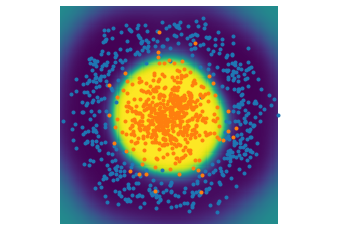

In [49]:
plt.clf
plt.imshow(Theta.transpose(), origin="lower",  extent=[-tmax, tmax, -tmax, tmax])
plt.plot(X[I,0], X[I,1], '.')
plt.plot(X[J,0], X[J,1], '.')
plt.axis('equal')
plt.axis('off');

__Exercise 5__

Display evolution of the classification probability with $\sigma$

In [146]:
def make_image_classification(ax,sigma,tau=10,n_steps = 10000):
    q = 201
    tmax = 5
    t = np.linspace(-tmax,tmax,num=q)
    [B,A] = np.meshgrid( t,t )
    G = np.vstack([A.flatten(), B.flatten()]).transpose()
    K1 = kappa(G,X,sigma)
    K = kappa(X,X,sigma)
    h,E_decay = gradient_descent_cholesky(tau,n_steps,K,y)
    #plt.plot(list(range(n_steps+1)),E_decay)
    #plt.show()
    Theta = theta( K1.dot(h.flatten()) )
    Theta = Theta.reshape((q,q))
    ax.imshow(Theta.transpose(), origin="lower",  extent=[-tmax, tmax, -tmax, tmax])
    #ax.plot(X[I,0], X[I,1], '.')
    #ax.plot(X[J,0], X[J,1], '.')
    ax.axis('equal')
    ax.axis('off')
    ax.set_title(f'sigma = {sigma}')
    return (list(range(n_steps+1)),E_decay)

/opt/miniconda3/envs/p36/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


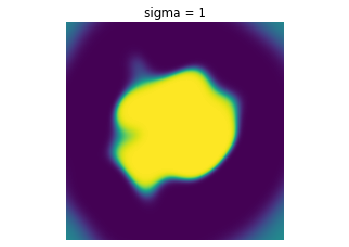

In [147]:
fig,ax = plt.subplots(1)
steps,decay = make_image_classification(ax,1)
fig.show()

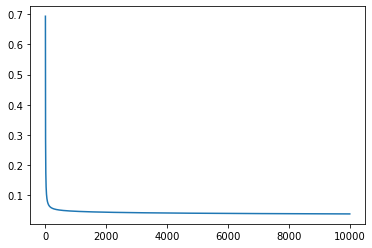

In [148]:
#convergence checker
plt.plot(steps,decay)

/opt/miniconda3/envs/p36/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


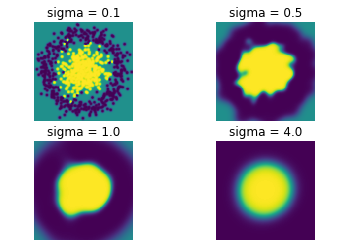

In [149]:
sigma_mat = np.array([[0.1,0.5],[1,4]])
s1,s2 = sigma_mat.shape
fig, ax = plt.subplots(s1,s2)
decay_list = []
for i in range(s1):   
    decay_list.append([])
    for j in range(s2):
        sigma = sigma_mat[i,j]
        steps,decay = make_image_classification(ax[i,j],sigma,tau=1,n_steps = int(10000/sigma))
        decay_list[i].append((steps,decay))
fig.show()

/opt/miniconda3/envs/p36/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


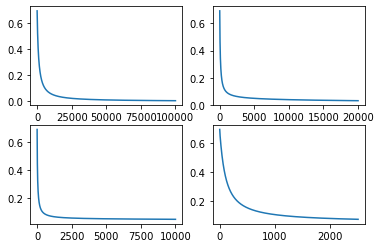

In [150]:
fig, ax = plt.subplots(s1,s2)

for i in range(s1):   
    for j in range(s2):
        sigma = sigma_mat[i,j]
        steps,decay = decay_list[i][j]
        ax[i,j].plot(steps,decay,label = f'sigma = {sigma}')
fig.show()

__Exercise 6__

Separate the dataset into a training set and a testing set. Evaluate the classification performance
for varying $\si$. Try to introduce regularization and minmize
$$ \umin{h} F(h) \eqdef \Ll(K h,y) + \la R(h) $$
where for instance $R=h^{\top} K h$ which is the Kernel norm.

Recall from the course that $h^{\top} K h$ is actually the RKHS norm $\|f_h\|_{RKHS}$ : it is therefore natural in this setting. 

Note that if we try to implement gradient descent with this norm, we will have to compute products of the form $K h$ at each step (for the gradient of the norm). This is why finding a cholesky factor beforehand $LL^{\top} = K$ and changing variables is important : indeed, if $\tilde{h} = L^{\top}h$, the problem is now 
$$ \min_{\tilde{h}} F(\tilde{h}) \eqdef \Ll(L \tilde{h},y) + \la\|\tilde{h}\|^2 $$

In [74]:
# Creating dataset 

In [75]:
n = 1000
n1 = int(n/2)
p = 2;
t = 2*np.pi*np.random.randn(n1,1);
R = 2.5; 
r = R*(1.5 + .2*np.random.randn(n1,1)); # radius
X1 = np.hstack((np.cos(t)*r, np.sin(t)*r));
X = np.vstack((np.random.randn(n1,2), X1))
y = np.vstack(( np.ones([n1,1]), -np.ones([n1,1]) ))
randperm = np.random.permutation(X.shape[0])
X = X[randperm,:]
y = y[randperm]

In [82]:
# splitting into train and test 
n_train = int(n/2)
X_train,y_train = X[:n_train,:],y[:n_train]
X_valid,y_valid = X[n_train:],y[n_train:]
def classif_loss(y1,y2):
    n = y1.shape[0]
    n_right = ((y1*y2)>0).sum()
    return n_right/n

In [89]:
# simple case
def train_test(sigma,tau =1,n_steps =10000):
    K = kappa(X_train,X_train,sigma)
    K1 = kappa(X_train,X_valid,sigma)
    m = K.shape[0]
    h = np.zeros((m,1))
    L = np.linalg.cholesky(K+1e-12*np.eye(m))
    L1 = scp.linalg.solve_triangular(L,K1,lower = True,trans = 0)
    L1 = L1.transpose()
    train_loss = []
    test_loss =[]
    c_loss = []
    train_loss.append(F(h,L,y_train))
    test_loss.append(F(h,L1,y_valid))
    c_loss.append(classif_loss((L1 @ h).reshape(y_valid.shape),y_valid))
    for k in range(n_steps):
        h = h-tau*nablaF(h,L,y_train)
        train_loss.append(F(h,L,y_train))
        test_loss.append(F(h,L1,y_valid))
        c_loss.append(classif_loss((L1 @ h).reshape(y_valid.shape),y_valid))
    real_h = scp.linalg.solve_triangular(L,h,lower = True,trans = 1)
    return real_h,train_loss,test_loss,c_loss,list(range(n_steps+1))
    

/opt/miniconda3/envs/p36/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


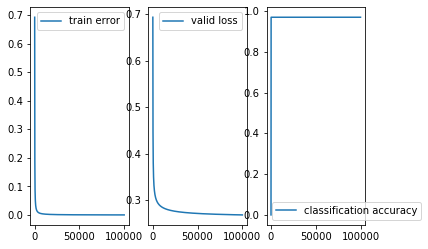

In [97]:
sigma = 0.1
h,tl,vl,cl,steps = train_test(sigma,tau =10,n_steps =100000)

fig,ax = plt.subplots(1,3)
ax[0].plot(steps,tl,label = 'train error')
ax[0].legend()
ax[1].plot(steps,vl,label = 'valid loss')
ax[1].legend()
ax[2].plot(steps,cl,label = 'classification accuracy')
ax[2].legend()
fig.show()

In [96]:
#kernel_regularization

In [98]:
def train_test_reg(sigma,la,tau =1,n_steps =10000):
    K = kappa(X_train,X_train,sigma)
    K1 = kappa(X_train,X_valid,sigma)
    m = K.shape[0]
    h = np.zeros((m,1))
    L = np.linalg.cholesky(K+1e-12*np.eye(m))
    L1 = scp.linalg.solve_triangular(L,K1,lower = True,trans = 0)
    L1 = L1.transpose()
    train_loss = []
    test_loss =[]
    c_loss = []
    train_loss.append(F(h,L,y_train)+la*(h**2).sum()/2)
    test_loss.append(F(h,L1,y_valid))
    c_loss.append(classif_loss((L1 @ h).reshape(y_valid.shape),y_valid))
    for k in range(n_steps):
        h = (1-tau*la)*h-tau*(nablaF(h,L,y_train))
        train_loss.append(F(h,L,y_train))
        test_loss.append(F(h,L1,y_valid))
        c_loss.append(classif_loss((L1 @ h).reshape(y_valid.shape),y_valid))
    real_h = scp.linalg.solve_triangular(L,h,lower = True,trans = 1)
    return real_h,train_loss,test_loss,c_loss,list(range(n_steps+1))

/opt/miniconda3/envs/p36/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


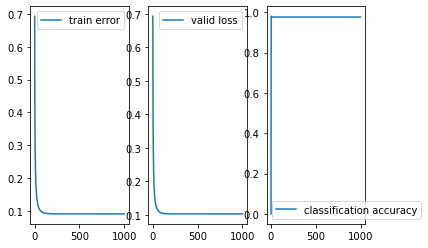

In [100]:
sigma = 1
la = 1e-3
h,tl,vl,cl,steps = train_test_reg(sigma,la,tau =10,n_steps =1000)

fig,ax = plt.subplots(1,3)
ax[0].plot(steps,tl,label = 'train error')
ax[0].legend()
ax[1].plot(steps,vl,label = 'valid loss')
ax[1].legend()
ax[2].plot(steps,cl,label = 'classification accuracy')
ax[2].legend()
fig.show()